✅ Dataset loaded successfully!
Shape: (63930, 5)
          Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 00:00           380.047791          5.311336   
1  01 01 2018 00:10           453.769196          5.672167   
2  01 01 2018 00:20           306.376587          5.216037   
3  01 01 2018 00:30           419.645905          5.659674   
4  01 01 2018 00:40           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
3                     516.127569          271.258087  
4                     491.702972          265.674286  

Missing Values in Each Column:
Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    1
Wind Direction (°)               1
dtype: int64

✅ Missing values removed.
N

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127788 (\N{WIND BLOWING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


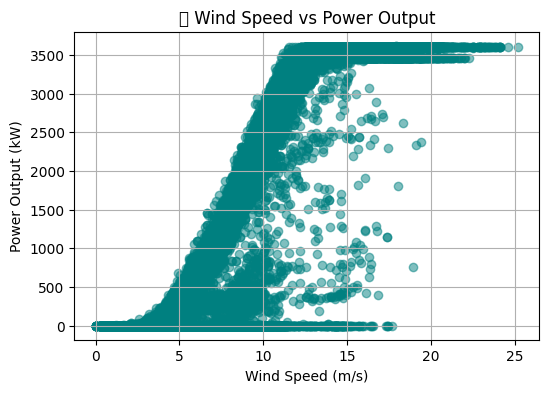

In [ ]:
# Wind Energy Data Preprocessing

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Step 2: Load Dataset
data = pd.read_csv("T1.csv")   # 👈 Make sure your dataset name is correct
print("✅ Dataset loaded successfully!")
print("Shape:", data.shape)
print(data.head())

# Step 3: Check for Missing Values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# Step 4: Drop Missing Values
data = data.dropna()
print("\n✅ Missing values removed.")
print("New shape:", data.shape)

# Step 5: Select Important Features
# (Using correct column names from your dataset)
features = data[['Wind Speed (m/s)', 'Wind Direction (°)', 'Theoretical_Power_Curve (KWh)']]
target = data['LV ActivePower (kW)']

# Step 6: Normalize the Features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Step 7: Create Preprocessed DataFrame
processed = pd.DataFrame(features_scaled, columns=features.columns)
processed['Target_Power'] = target.values

# Step 8: Save Preprocessed Data
processed.to_csv("processed_wind_data.csv", index=False)
print("\n✅ Preprocessing complete! Saved as processed_wind_data.csv")

# Step 9: Visualization
plt.figure(figsize=(6,4))
plt.scatter(data['Wind Speed (m/s)'], data['LV ActivePower (kW)'], alpha=0.5, color='teal')
plt.title("🌬️ Wind Speed vs Power Output")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power Output (kW)")
plt.grid(True)
plt.show()
